In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

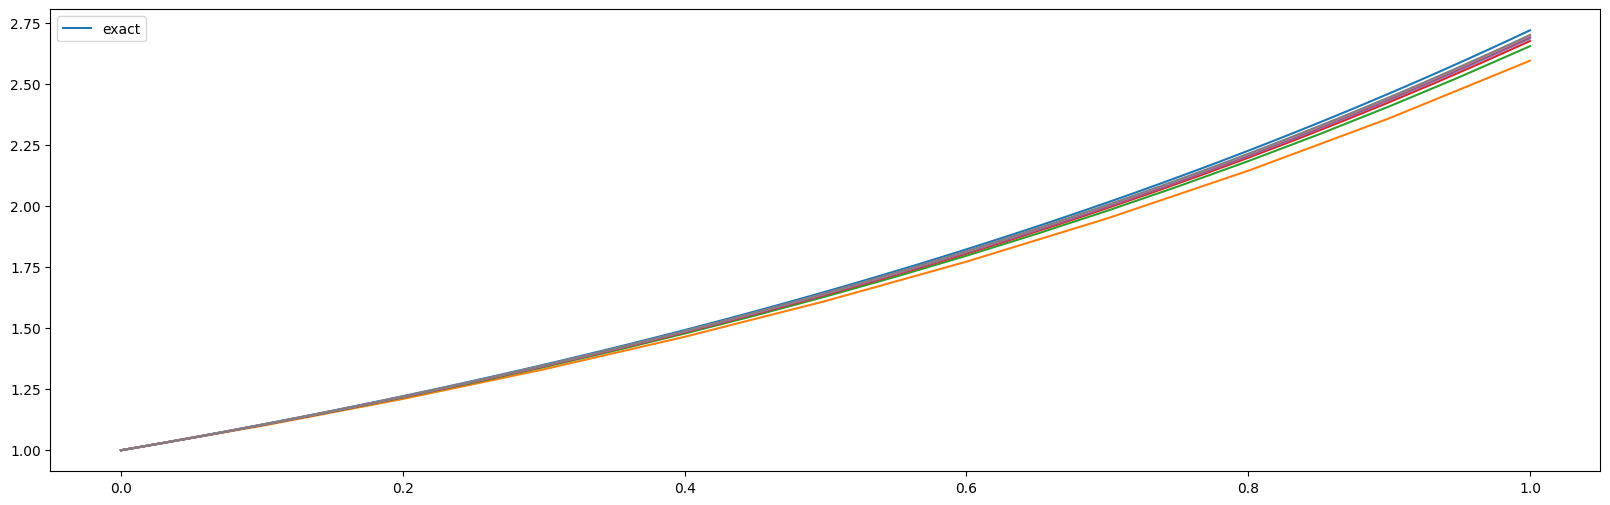

In [5]:
dx_dt = lambda t, x: x

def euler(x0, t0, t1, n = 100):
    ts = np.linspace(t0, t1, n+1)
    xs = np.zeros(n+1)
    xs[0] = x0
    h = (t1-t0)/n
    for i in range(n):
        xs[i+1] = xs[i] + h * dx_dt(ts[i], xs[i])
    return ts, xs

plt.figure(figsize=(20, 6))
ts = np.linspace(0, 1, 101)
plt.plot(ts, np.exp(ts), label='exact' )
for k in range(1,8):
    ts, xs = euler(1, 0, 1, 10 * k)
    plt.plot(ts, xs)
plt.legend()

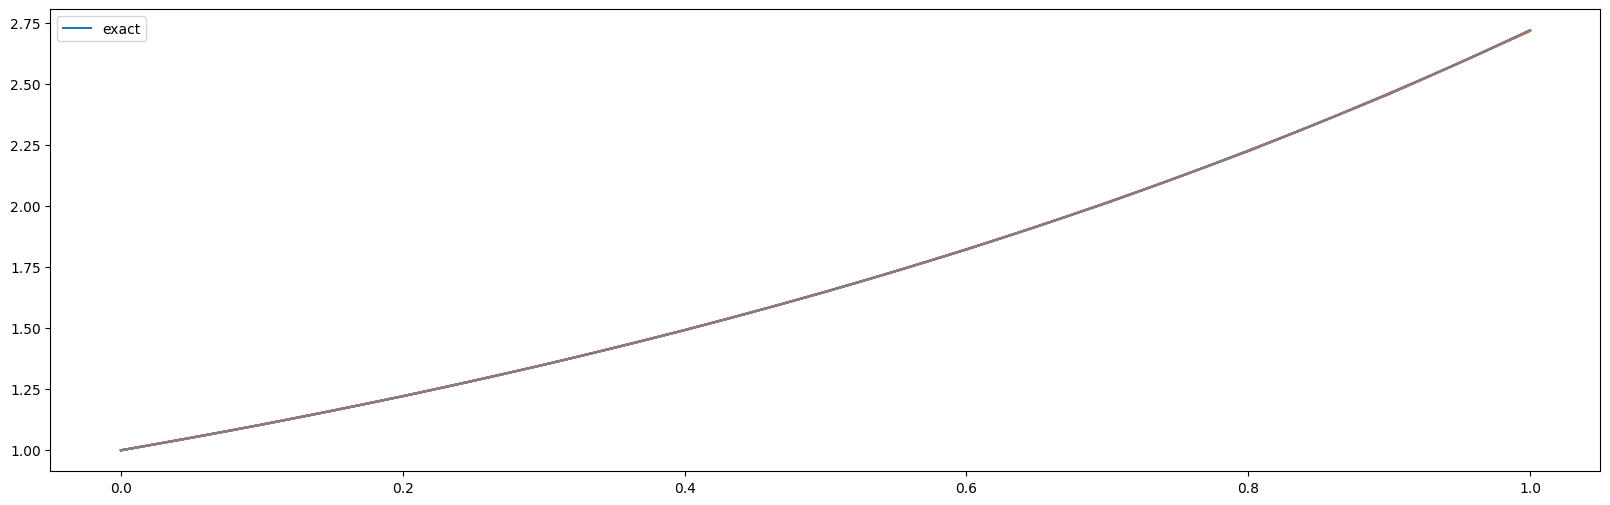

In [6]:
def midpoint(x0, t0, t1, n = 100):
    ts = np.linspace(t0, t1, n+1)
    xs = np.zeros(n+1)
    xs[0] = x0
    h = (t1-t0)/n
    for i in range(n):
        xs[i+1] = xs[i] + h * dx_dt(ts[i] + h/2, xs[i] + h/2 * dx_dt(ts[i], xs[i]))
    return ts, xs

plt.figure(figsize=(20, 6))
ts = np.linspace(0, 1, 101)
plt.plot(ts, np.exp(ts), label='exact' )
for k in range(1,8):
    ts, xs = midpoint(1, 0, 1, 10 * k)
    plt.plot(ts, xs)
plt.legend()

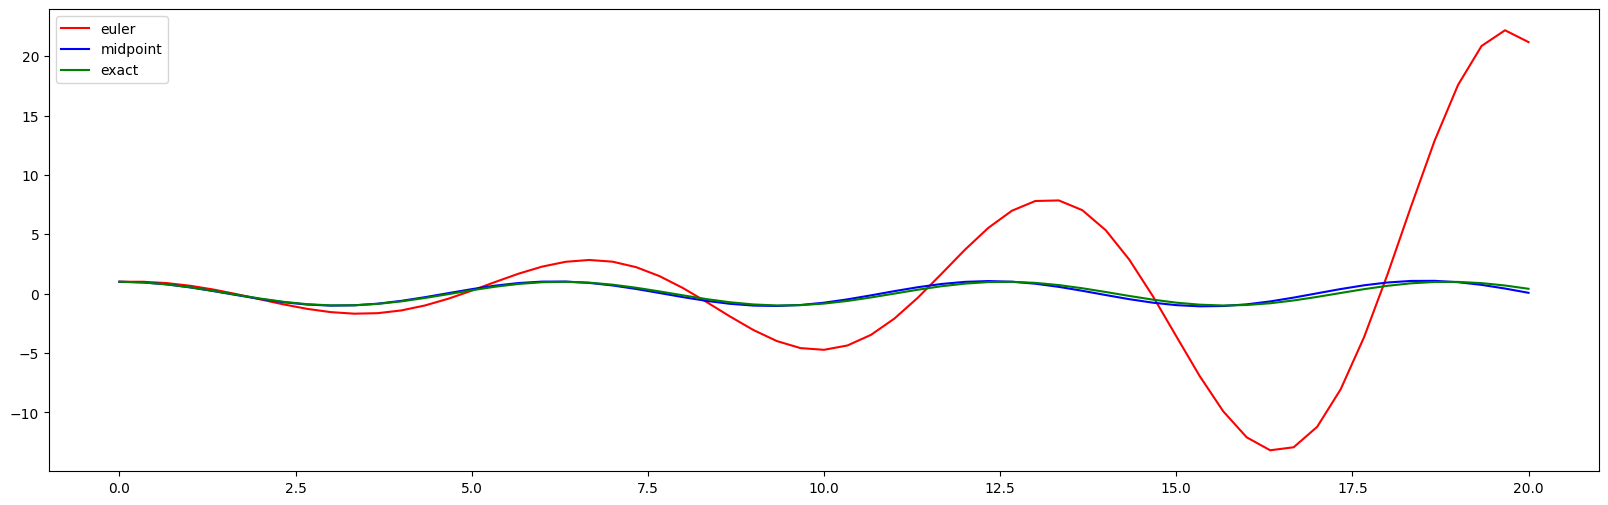

In [22]:
du_dt = lambda t, u: np.array([u[1], -u[0]])

def euler_shm(u0, t0, t1, n = 100):
    ts = np.linspace(t0, t1, n+1)
    us = np.zeros((n+1, 2))
    us[0] = u0
    h = (t1-t0)/n
    for i in range(n):
        us[i+1] = us[i] + h * du_dt(ts[i], us[i])
    return ts, us

def midpoint_shm(u0, t0, t1, n = 100):
    ts = np.linspace(t0, t1, n+1)
    us = np.zeros((n+1, 2))
    us[0] = u0
    h = (t1-t0)/n
    for i in range(n):
        us[i+1] = us[i] + h * du_dt(ts[i] + h/2, us[i] + h/2 * du_dt(ts[i], us[i]))
    return ts, us

te, xe = euler_shm(np.array([1, 0]), 0, 20, 60)
tm, xm = midpoint_shm(np.array([1, 0]), 0, 20, 60)

plt.figure(figsize=(20, 6))
plt.plot(te, xe[:,0], color = 'red', label = 'euler' )
plt.plot(tm, xm[:,0], color = 'blue', label = 'midpoint' )
plt.plot(te, np.cos(te), color = 'green', label = 'exact' )
plt.legend()